<a href="https://colab.research.google.com/github/m1key/raspberry-pi/blob/master/moist/Moisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

urls = ['https://raw.githubusercontent.com/m1key/raspberry-pi/master/moist/moisture.csv',
        'https://raw.githubusercontent.com/m1key/raspberry-pi/master/moist/moisture2.csv',
        'https://raw.githubusercontent.com/m1key/raspberry-pi/master/moist/moisture3.csv',
        'https://raw.githubusercontent.com/m1key/raspberry-pi/master/moist/moisture4.csv',
        'https://raw.githubusercontent.com/m1key/raspberry-pi/master/moist/moisture5.csv']
df = pd.concat((pd.read_csv(f, sep=",", names=['datetime', 'temperature', 'moisture']) for f in urls))
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.groupby(pd.Grouper(freq="10min")).min()
df = df.reset_index()
df['moisture'] = df['moisture'] / (df['temperature']**1.2) # they seem to be correlated, power used
df.iloc[[0, -1]]

,datetime,temperature,moisture
0,2020-05-08 19:50:00,21.417559,20.389711
9220,2020-07-11 20:30:00,24.700242,6.949862


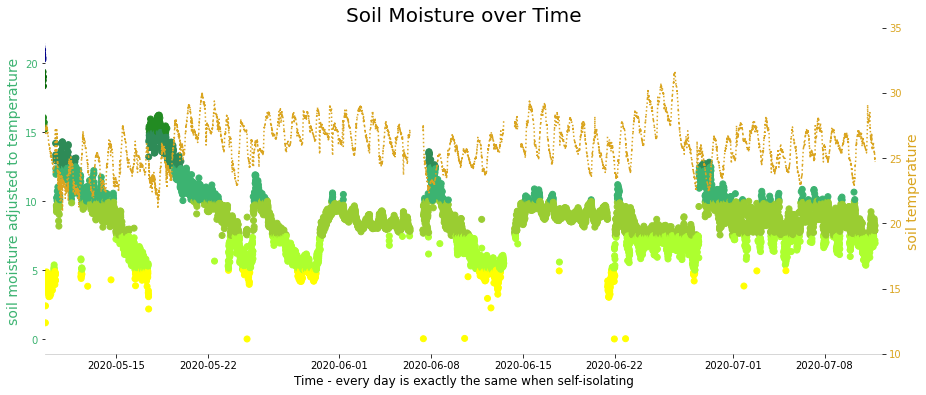

In [5]:
import matplotlib.pyplot as plt

factor = 0.04 # no power
factor = 0.025 # power
import numpy as np
colors = np.where(df["moisture"] > 900 * factor, 'navy',
                  (np.where(df["moisture"] > 800 * factor, 'darkblue',
                            (np.where(df["moisture"] > 700 * factor, 'darkgreen',
                                      (np.where(df['moisture'] > 600 * factor, 'forestgreen',
                                                (np.where(df['moisture'] > 500 * factor, 'seagreen',
                                                          np.where(df['moisture'] > 400 * factor, 'mediumseagreen',
                                                                   np.where(df['moisture'] > 300 * factor, 'yellowgreen',
                                                                            np.where(df['moisture'] > 200 * factor, 'greenyellow','yellow'))))))))))))

fig, ax = plt.subplots(1, figsize=(15,6)) 
ax.scatter(df['datetime'], df['moisture'], c=colors)
ax.set_ylabel('soil moisture adjusted to temperature', color='mediumseagreen', fontsize=14)
ax.tick_params(axis='y', labelcolor='mediumseagreen')
ax.set_xlabel('Time - every day is exactly the same when self-isolating', fontsize=12)

ax2 = ax.twinx()
ax2.plot(df['datetime'], df['temperature'], linestyle='dotted', color='goldenrod')
ax2.set_ylabel('soil temperature', color='goldenrod', fontsize=14)
ax2.tick_params(axis='y', labelcolor='goldenrod')
ax2.set_ylim(10, 35)

plt.title('Soil Moisture over Time', fontsize=20)
import datetime
#from datetime import timedelta
#plt.xlim(datetime.datetime.now() - timedelta(hours=24*11))
# 2020-05-09 14:00 large plant
# 2020-05-24 22:00 tree of life
# 2020-06-21 11:00 palm tree
plt.xlim(datetime.datetime(2020, 5, 9, 14, 00), datetime.datetime.now())

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['left'].set_alpha(0.0)
ax.spines['bottom'].set_alpha(0.1)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_alpha(0.0)
ax2.spines['bottom'].set_alpha(0.1)

plt.show()